# Diamonds Dataset

## Frame the problem

Predict the price of the diamonds

### Acquire the Data

In [144]:
import pandas as pd

In [145]:
df = pd.read_csv('diamonds.csv')

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (9,7)

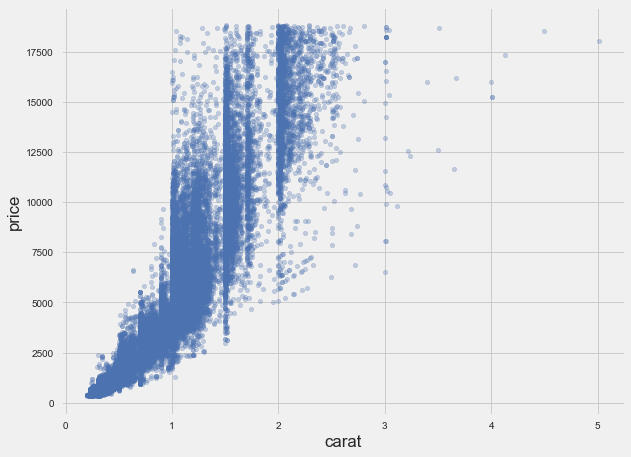

In [147]:
df.plot(kind="scatter", x='carat', y='price', s=20, alpha=0.3)

In [148]:
import numpy as np

In [149]:
df['priceLog'] = np.log(df.price)
df['caratLog'] = np.log(df.carat)

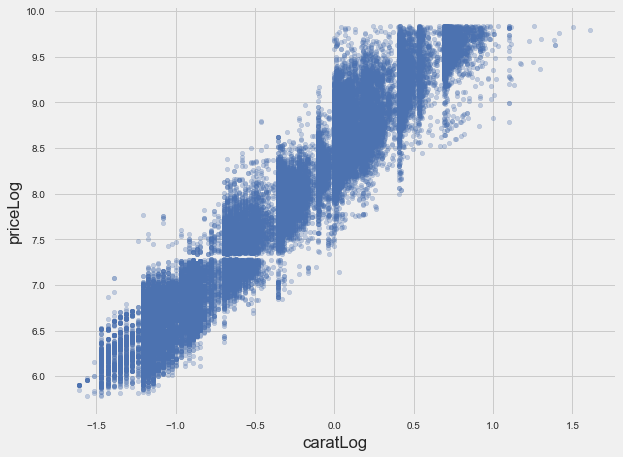

In [150]:
df.plot(kind="scatter", x='caratLog', y='priceLog', s=20, alpha=0.3)

## Model

- Model 1 - Run for priceLog vs caratLog
- Model 2 - For priceLog vs CaratLog, Cut, Color, Clarity

- Understand Cross-Validation 
- Understand Regularisation

In [151]:
import pandas as pd
import numpy as np

In [152]:
df = pd.read_csv('diamonds.csv')

In [153]:
df['priceLog'] = np.log(df.price)
df['caratLog'] = np.log(df.carat)

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [155]:
X = df[['caratLog', 'color', 'cut', 'clarity']]

In [156]:
y = df.priceLog

In [157]:
X_encoded = pd.get_dummies(X)

In [158]:
def ols_model(X, y):
    lm = linear_model.LinearRegression()
    lm.fit(X,y)
    yhat = lm.predict(X)
    error_insample = mean_squared_error(y_true=y, y_pred=yhat)
    scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
    error_outsample = scores.mean()*-1
    return error_insample, error_outsample

In [159]:
X_carat = X_encoded[['caratLog']]

In [160]:
X_carat_color = X_encoded.iloc[:,0:8]

In [161]:
X_all = X_encoded

In [162]:
ols_model(X_carat, y)

(0.068987118988897922, 0.071785049290182701)

In [163]:
ols_model(X_carat_color, y)

(0.056252231651785722, 0.0593685876820121)

In [164]:
ols_model(X_all, y)

(0.017896584405446458, 0.018713014982873897)

In [165]:
from sklearn.preprocessing import LabelEncoder

In [166]:
le = LabelEncoder()

In [167]:
X_label = X.copy()

In [168]:
X_label['cut'] = le.fit_transform(X['cut'])
X_label['clarity'] = le.fit_transform(X['clarity'])
X_label['color'] = le.fit_transform(X['color'])

In [171]:
ols_model(X_label, y)

(0.045598513779504933, 0.047838258515101359)